<a href="https://colab.research.google.com/github/MikelBarajas38/MachineLearning/blob/main/RegComp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparative Analysis of Regression Models**

## Machine Learning
### Mikel Ignacio Barajas Martínez

Ingeniería en Sistemas Inteligentes, 2021, 336483, 202102300012 \
Machine Learning, 281601

### 02/11/24

𝝮



In [950]:
# base imports
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## **Abstract**

This notebook describes a method to compare and analyze different regression models using four different evaluation metrics: mean square error (MSE) on training data, MSE on testing data, bias, and variance. This approach is demonstrated by comparing four regression models (linear, polynomial, cubic splines, and fourier regression) using a synthetic light curve time series dataset. The results for each of the models using varying levels of noise and gaps are shown.

## **Introduction**

Regression models are method from approximation theory: fitting functions to given data and finding the “best” in a certain class to
represent said data (Burden & Faires, 2001).

Most regression models can be represented as an optimization problem: trying to find the best values or coefficients given a metric. This notebook aims to establish a process to compare said models.

## **Dataset**

The dataset used consists of three different synthetic time series with different gap sizes and noise levels. These series represent examples related to the time delay challenge light curves: the x-axis represents time, and the y-axis represents the magnitude (mag) of the light intensity of a quasar. Originally, this data was intended for testing and researching strong lensing and time delay.


The first time series represents the ground truth (GT), given that it has no gaps and a null level of noise. Two curves (A and B) are described, but only curve A is used for this assignment. The next two files contain the same curves with variable levels of noise and gaps and with 100 realizations per sample (out of the 1 present in the GT). Originally, the mean value of all 100 realizations was to be taken, but choosing only 1 of the realizations, and consequently choosing a more erratic curve, made for a better suit given the assignment’s goal of testing different degrees for polynomial regression.

In [951]:
drive.mount('/content/gdrive')
!ls "/content/gdrive/My Drive/ML/TimeDelayStrongLensing/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
DS-5-1-GAP-0-1-N-0_v2.csv  DS-5-1-GAP-1-1-N-1_v2.csv  DS-5-1-GAP-5-1-N-3_v2.csv


In [952]:
# GT: Artificial data with 50 samples, 0 gaps and noise level 0, 1 realization per sample
df_GAP0_N0 = pd.read_csv("/content/gdrive/My Drive/ML/TimeDelayStrongLensing/DS-5-1-GAP-0-1-N-0_v2.csv", header=None)
df_GAP0_N0.name = 'DS-5-1-GAP-0-1-N-0_v2'
column_names = ['time'] + [i for i in range(len(df_GAP0_N0.columns) - 1)]
df_GAP0_N0.columns = column_names
#print(df_GAP0_N0)

# DS1: Artificial data with 45 samples, 1 gap and noise level 1, 100 realizations per sample
df_GAP1_N1 = pd.read_csv("/content/gdrive/My Drive/ML/TimeDelayStrongLensing/DS-5-1-GAP-1-1-N-1_v2.csv", header=None)
df_GAP1_N1.name = 'DS-5-1-GAP-1-1-N-1_v2'
column_names = ['time'] + [i for i in range(len(df_GAP1_N1.columns) - 1)]
df_GAP1_N1.columns = column_names
# print(df_GAP1_N1)

# DS2: Artificial data with 25 samples, 5 gaps and noise level 3, 100 realizations per sample
df_GAP5_N3 = pd.read_csv("/content/gdrive/My Drive/ML/TimeDelayStrongLensing/DS-5-1-GAP-5-1-N-3_v2.csv", header=None)
df_GAP5_N3.name = 'DS-5-1-GAP-5-1-N-3_v2'
column_names = ['time'] + [i for i in range(len(df_GAP5_N3.columns) - 1)]
df_GAP5_N3.columns = column_names
# print(df_GAP5_N3)

In [953]:
df_GAP0_N0

,time,0,1
0,0.00,17.49,17.04
1,2.12,17.65,17.17
2,3.06,17.70,17.24
3,4.16,17.73,17.33
4,4.93,17.75,17.39
5,6.09,17.75,17.48
6,6.57,17.75,17.51
7,7.93,17.73,17.59
8,8.67,17.71,17.62
9,9.83,17.68,17.65


In [954]:
df_GAP1_N1

,time,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
0,0.00,17.49,17.50,17.49,17.49,17.50,17.49,17.50,17.49,17.49,...,17.04,17.04,17.05,17.04,17.03,17.04,17.04,17.04,17.03,17.04
1,2.12,17.65,17.65,17.64,17.64,17.65,17.65,17.65,17.64,17.65,...,17.16,17.17,17.18,17.18,17.18,17.17,17.17,17.18,17.18,17.18
2,3.06,17.69,17.70,17.70,17.69,17.69,17.70,17.69,17.69,17.70,...,17.25,17.24,17.24,17.24,17.25,17.24,17.24,17.24,17.25,17.25
3,4.16,17.74,17.73,17.74,17.73,17.74,17.74,17.74,17.74,17.73,...,17.33,17.32,17.33,17.33,17.33,17.32,17.33,17.33,17.32,17.32
4,4.93,17.75,17.74,17.73,17.74,17.74,17.75,17.75,17.75,17.74,...,17.38,17.39,17.39,17.39,17.39,17.39,17.39,17.39,17.39,17.39
5,6.09,17.75,17.74,17.74,17.75,17.75,17.76,17.74,17.75,17.74,...,17.47,17.49,17.48,17.49,17.47,17.48,17.48,17.47,17.47,17.47
6,6.57,17.75,17.75,17.74,17.74,17.75,17.75,17.75,17.75,17.75,...,17.51,17.51,17.51,17.52,17.51,17.51,17.51,17.51,17.51,17.51
7,7.93,17.73,17.72,17.73,17.73,17.73,17.72,17.72,17.73,17.73,...,17.60,17.60,17.58,17.59,17.60,17.59,17.59,17.59,17.59,17.59
8,8.67,17.71,17.72,17.71,17.72,17.72,17.72,17.71,17.71,17.71,...,17.62,17.61,17.61,17.62,17.61,17.63,17.61,17.62,17.62,17.62
9,9.83,17.68,17.68,17.69,17.70,17.68,17.69,17.67,17.68,17.68,...,17.65,17.64,17.64,17.65,17.64,17.65,17.65,17.64,17.66,17.65


In [955]:
df_GAP5_N3

,time,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
0,0.00,17.61,17.55,17.48,17.46,17.43,17.53,17.35,17.66,17.60,...,17.16,17.03,17.12,17.04,17.03,16.98,17.24,16.97,17.09,17.05
1,2.12,17.71,17.55,17.70,17.52,17.67,17.62,17.76,17.73,17.63,...,17.24,17.17,17.24,16.95,17.17,17.19,17.14,17.18,17.17,16.97
2,3.06,17.68,17.77,17.61,17.72,17.73,17.78,17.80,17.81,17.68,...,17.42,17.27,17.22,17.31,17.31,17.20,17.19,17.22,17.29,17.26
3,4.16,17.62,17.72,17.66,17.69,17.75,17.65,17.82,17.78,17.86,...,17.32,17.28,17.25,17.45,17.37,17.37,17.47,17.34,17.33,17.56
4,4.93,17.80,17.54,17.66,17.71,17.82,17.69,17.70,17.81,17.82,...,17.33,17.46,17.39,17.52,17.40,17.38,17.42,17.31,17.38,17.38
5,6.09,17.74,17.69,17.74,17.72,17.73,17.66,17.70,17.75,17.71,...,17.55,17.43,17.47,17.49,17.43,17.45,17.46,17.47,17.42,17.41
6,6.57,17.67,17.59,17.67,17.73,17.80,17.66,17.75,17.78,17.77,...,17.54,17.48,17.77,17.57,17.39,17.42,17.57,17.48,17.57,17.47
7,12.72,17.60,17.63,17.55,17.51,17.68,17.52,17.51,17.57,17.48,...,17.56,17.60,17.68,17.67,17.83,17.47,17.61,17.70,17.68,17.53
8,18.95,17.35,17.23,17.49,17.40,17.40,17.44,17.48,17.26,17.38,...,17.35,17.34,17.35,17.53,17.24,17.50,17.57,17.45,17.51,17.61
9,20.20,17.37,17.37,17.45,17.53,17.14,17.24,17.40,17.22,17.22,...,17.37,17.41,17.44,17.36,17.42,17.41,17.42,17.50,17.58,17.43


### **Visualization**

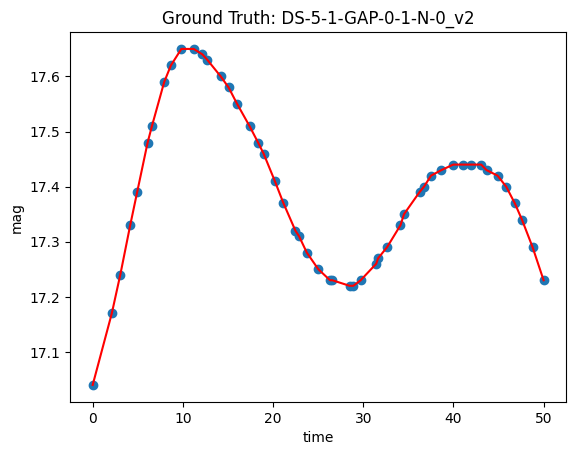

In [956]:
plt.title(f'Ground Truth: {df_GAP0_N0.name}')

plt.xlabel('time')
plt.ylabel('mag')

plt.plot(df_GAP0_N0['time'], df_GAP0_N0[1], 'r')
plt.scatter(df_GAP0_N0['time'], df_GAP0_N0[1])

plt.show()

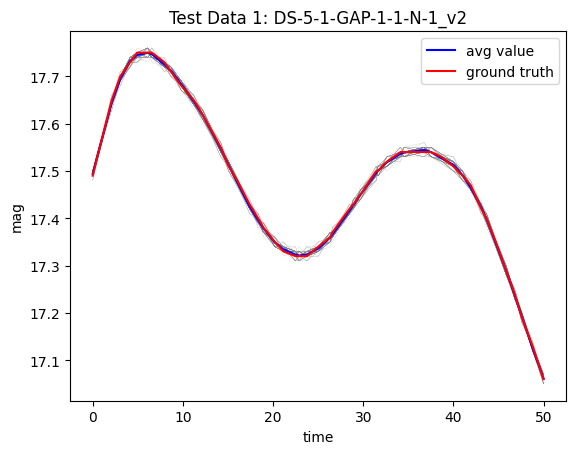

In [957]:
plt.title(f'Test Data 1: {df_GAP1_N1.name}')

plt.xlabel('time')
plt.ylabel('mag')

for i in range(100):
    plt.plot(df_GAP1_N1['time'], df_GAP1_N1[i], 'grey', linewidth = '0.1')

A = df_GAP1_N1.iloc[:, 1:101]
A_mean = np.mean(A, axis = 1)
plt.plot(df_GAP1_N1['time'], A_mean, 'b', label = 'avg value')
# plt.scatter(df_GAP1_N1[0], df_GAP1_N1[1], label = 'chosen test sample')

plt.plot(df_GAP0_N0['time'], df_GAP0_N0[0], 'r', label = 'ground truth')

plt.legend(loc="best")

plt.show()

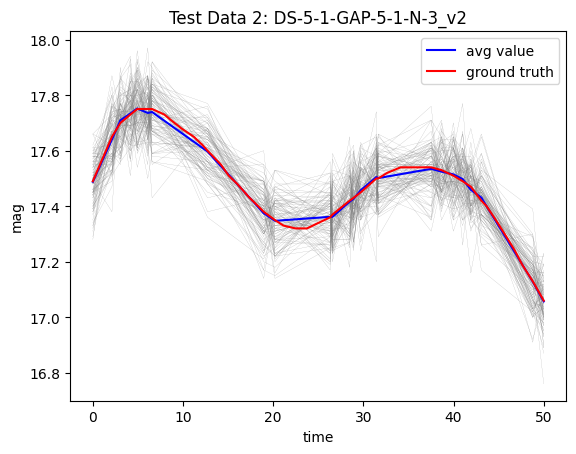

In [958]:
plt.title(f'Test Data 2: {df_GAP5_N3.name}')

plt.xlabel('time')
plt.ylabel('mag')

for i in range(100):
    plt.plot(df_GAP5_N3['time'], df_GAP5_N3[i], 'grey', linewidth = '0.1')

A = df_GAP5_N3.iloc[:, 1:101]
A_mean = np.mean(A, axis = 1)
plt.plot(df_GAP5_N3['time'], A_mean, 'b', label = 'avg value')
# plt.scatter(df_GAP5_N3[0], df_GAP5_N3[1], label = 'chosen test sample')

plt.plot(df_GAP0_N0['time'], df_GAP0_N0[0], 'r', label = 'ground truth')

plt.legend(loc="best")

plt.show()

## **Regression Models**

### **Setup**

While the regression models follow distinct processes to yield the predicted function, this output can be compared and ranked based on multiple metrics such as MSE (both on training and testing data), bias, and variance.

With the purpose of easily comparing different regression methods, a `ModelSet` class was created. This class' is not responsible for the actual model training and testing but is instead designed to store the output of all 100 models generated (each one corresponding to a realization) and compute the evaluation metrics.

In [959]:
# class imports
from sklearn.metrics import mean_squared_error, r2_score

In [961]:
class ModelSet:

    def __init__(self, name, x_gt, y_gt, x_train):

        self.name = name
        self.y_test = y_gt
        self.x_test = x_gt

        self.x_train = x_train
        self.y_train = pd.DataFrame()

        self.y_test_pred = pd.DataFrame()
        self.y_train_pred = pd.DataFrame()

    def count_realizations(self):
        return len(self.y_test_pred.columns)

    def add_realization(self, y_test_pred, y_train_pred, y_train):
        i = self.count_realizations()
        self.y_test_pred[i] = y_test_pred.squeeze()
        self.y_train_pred[i] = y_train_pred.squeeze()
        self.y_train[i] = y_train.squeeze()

    def MSE_train(self, realization = None):

        if realization is not None:
            return mean_squared_error(self.y_train_pred[realization], self.y_train[realization])

        realizations = self.count_realizations()
        MSE = np.zeros(realizations)

        for i in range(realizations):
            MSE[i] = mean_squared_error(self.y_train_pred[i], self.y_train[i])

        return np.mean(MSE)

    def MSE_test(self, realization = None):

        if realization is not None:
            return mean_squared_error(self.y_test_pred[realization], self.y_test)

        realizations = self.count_realizations()
        MSE = np.zeros(realizations)

        for i in range(realizations):
            MSE[i] = mean_squared_error(self.y_test_pred[i], self.y_test)

        return np.mean(MSE)

    def bias(self, realization = None):

        if realization is not None:
            return np.mean(abs(self.y_test_pred[realization] - self.y_test))

        realizations = self.count_realizations()
        bias = pd.DataFrame()

        for i in range(realizations):
            bias[i] = abs(self.y_test_pred[i] - self.y_test)

        return np.mean(bias.mean(axis = 1))

    def variance(self):
        return np.mean(self.y_test_pred.std(axis = 1))

    def plot(self):

        plt.title(f'{self.name}:\nAll Realizations')
        plt.ylim(self.y_test.min() - 0.1, self.y_test.max() + 0.1)

        realizations = self.count_realizations()
        for i in range(realizations):
            plt.plot(self.x_test, self.y_test_pred[i], linewidth = 1, alpha = 0.3)

        plt.errorbar(self.x_test, self.y_test_pred.mean(axis = 1), yerr = self.y_test_pred.std(axis = 1), fmt = 'ok', alpha = 0.5, markersize = 3)
        plt.plot(self.x_test, self.y_test_pred.mean(axis = 1), '--b', label = 'avg value')

        plt.plot(self.x_test, self.y_test, 'r', label = 'ground truth')

        plt.xlabel('time')
        plt.ylabel('mag')
        plt.legend(loc="best")
        plt.show()

The ground truth values were also established as 'global', since all methods, regardless of dataset, will use these values for validation.

In [962]:
# shared variables
x_test = df_GAP0_N0['time']
y_test = df_GAP0_N0[0]

In [ ]:
# utils
def to_column(series):
    return series.values.reshape(-1, 1)

### **Linear Regression**

This model is represented by the equation of the line. Let $a_1x_i+a_0$ denote the ith value on
the approximating line, and $y_i$ be the corresponding y-value. It is assumed that the independent
x variable is exact and the dependent y-value is unknown.

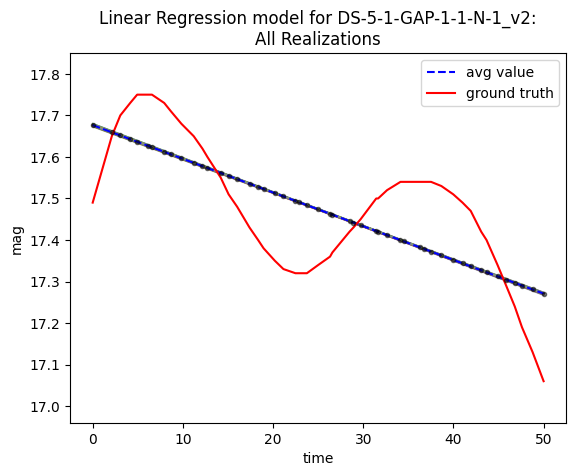

In [963]:
from sklearn import linear_model

x_train = df_GAP1_N1['time']

linear_d1 = ModelSet(f'Linear Regression model for {df_GAP1_N1.name}', x_test, y_test, x_train)

for i in range(100):

    y_train = df_GAP1_N1[i]

    # create ith model
    regr = linear_model.LinearRegression()

    # train ith model
    regr.fit(to_column(x_train), to_column(y_train))

    # generating model predictions
    y_test_pred = regr.predict(to_column(x_test))
    y_train_pred = regr.predict(to_column(x_train))

    # storing realization results
    linear_d1.add_realization(y_test_pred, y_train_pred, y_train)

linear_d1.plot()

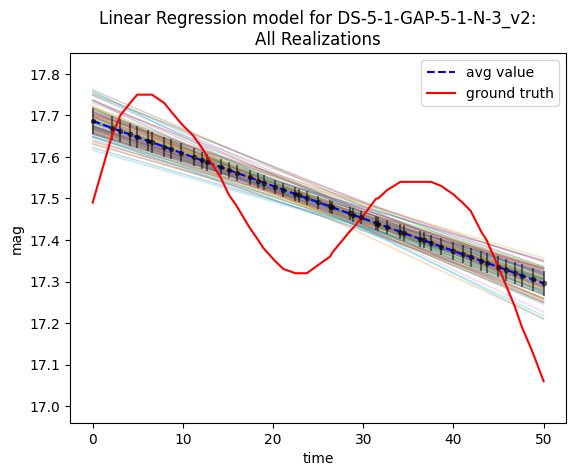

In [964]:
from sklearn import linear_model

x_train = df_GAP5_N3['time']

linear_d2 = ModelSet(f'Linear Regression model for {df_GAP5_N3.name}', x_test, y_test, x_train)

for i in range(100):

    y_train = df_GAP5_N3[i]

    # create ith model
    regr = linear_model.LinearRegression()

    # train ith model
    regr.fit(to_column(x_train), to_column(y_train))

    # generating model predictions
    y_test_pred = regr.predict(to_column(x_test))
    y_train_pred = regr.predict(to_column(x_train))

    # storing realization results
    linear_d2.add_realization(y_test_pred, y_train_pred, y_train)

linear_d2.plot()

### **Polynomial Regression**

Linear regression is a useful tool for finding approximations and studying the behavior of data. Still, most real-life problems are nonlinear, and so linear regression falls flat for further studies. Different results can be obtained using a similar technique from approximation theory (i.e., fitting functions to given data and finding the “best” in a certain class to represent said data), where a polynomial function is used as the approximating line.


Polynomial regression is just a generalization of the typical linear regression, since a straight line represents a polynomial of degree 1:

\begin{align}
        y = a_1x + a_0
\end{align}

The general expression of a polynomial is then:

\begin{align}
        y &= \sum_{i=0}^n a_{n-i}x^{n-i} \\
        &= a_nx^n + a_{n-1}x^{n-1} + \cdots + a_1x^1 + a_0
\end{align}

It must be noted that higher-degree polynomial approximators introduce oscillations that were not originally present in the data, so comparing and evaluating the functions becomes crucial when using these models.

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poo

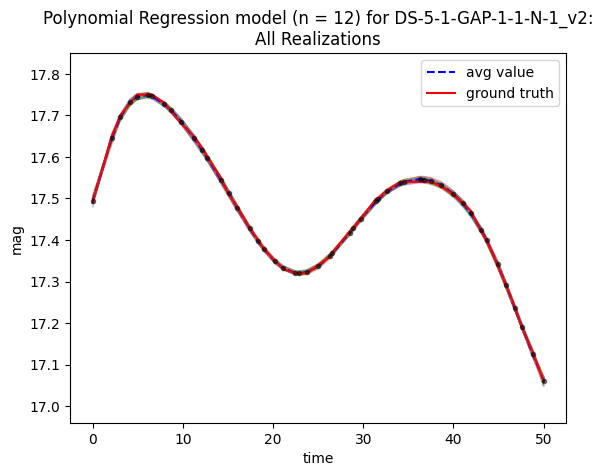

In [965]:
x_train = df_GAP1_N1['time']

n0 = 1
nf = 20

polynomial_d1 = []

for n in range(n0, nf + 1):
    n_poly_model = ModelSet(f'Polynomial Regression model (n = {n}) for {df_GAP1_N1.name}', x_test, y_test, x_train)

    for i in range(100):

        y_train = to_column(df_GAP1_N1[i])

        # create ith model
        # train ith model
        coef = np.polyfit(x_train, y_train, deg=n)

        # generating model predictions
        y_test_pred = np.polyval(coef, x_test)
        y_train_pred = np.polyval(coef, x_train)

        # storing realization results
        n_poly_model.add_realization(y_test_pred, y_train_pred, y_train)

    polynomial_d1.append(n_poly_model)

polynomial_d1[11].plot()

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poo

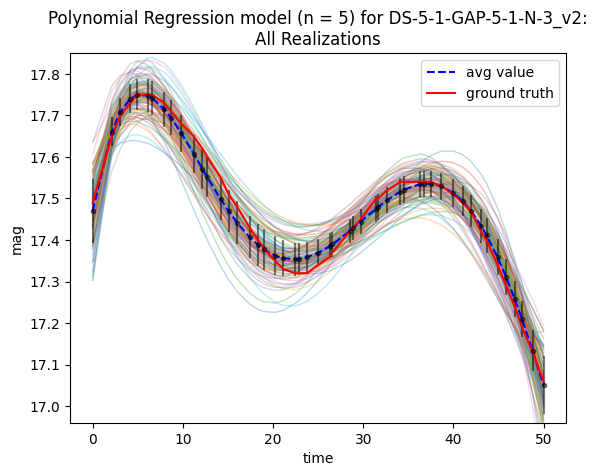

In [966]:
x_train = df_GAP5_N3['time']

n0 = 1
nf = 20

polynomial_d2 = []

for n in range(n0, nf + 1):
    n_poly_model = ModelSet(f'Polynomial Regression model (n = {n}) for {df_GAP5_N3.name}', x_test, y_test, x_train)

    for i in range(100):

        y_train = to_column(df_GAP5_N3[i])

        # create ith model
        # train ith model
        coef = np.polyfit(x_train, y_train, deg=n)

        # generating model predictions
        y_test_pred = np.polyval(coef, x_test)
        y_train_pred = np.polyval(coef, x_train)

        # storing realization results
        n_poly_model.add_realization(y_test_pred, y_train_pred, y_train)

    polynomial_d2.append(n_poly_model)

polynomial_d2[4].plot()

### **Splines**

Approximating arbitrary functions on closed intervals using a single polynomial, as mentioned before, may introduce erratic oscillations that misrepresent the real data.

One alternative approach is piecewise polynomial interpolation, which involves dividing the approximation interval into segments and constructing a (usually) different polynomial model on each of these intervals.

Cubic spline interpolation is the most common piecewise polynomial approximation method, using each successive pair of samples to construct a general cubic polynomial that satisfies a set of conditions (for more information on cubic spline interpolant conditions, see Burden & Faires, 2001).

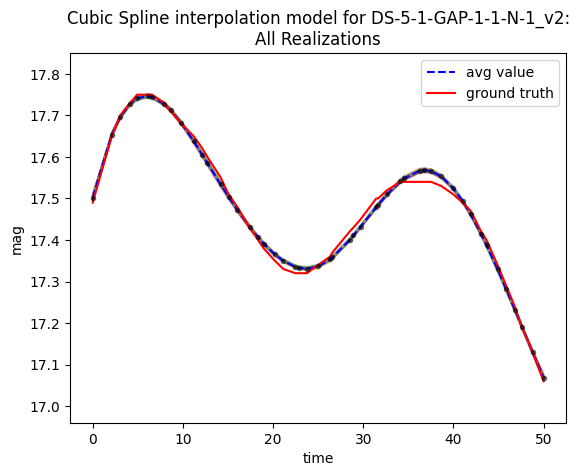

In [967]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import SplineTransformer

x_train = df_GAP1_N1['time']

splines_d1 = ModelSet(f'Cubic Spline interpolation model for {df_GAP1_N1.name}', x_test, y_test, x_train)

for i in range(100):

    y_train = df_GAP1_N1[i]

    # create ith model
    model = make_pipeline(SplineTransformer(n_knots=5, degree=3), Ridge(alpha=1e-3))

    # train ith model
    model.fit(to_column(x_train), to_column(y_train))

    # generating model predictions
    y_test_pred = model.predict(to_column(x_test))
    y_train_pred = model.predict(to_column(x_train))

    # storing realization results
    splines_d1.add_realization(y_test_pred, y_train_pred, y_train)

splines_d1.plot()

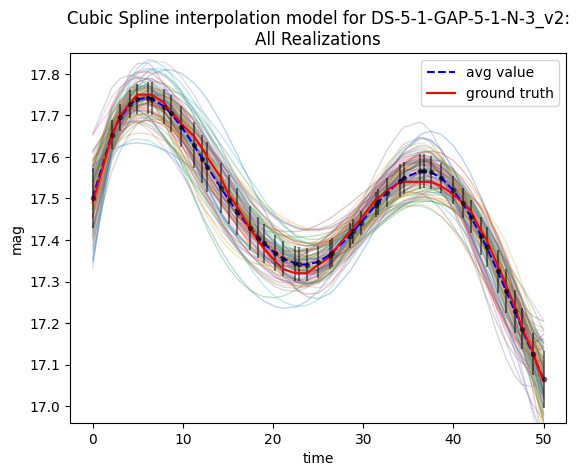

In [968]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import SplineTransformer

x_train = df_GAP5_N3['time']

splines_d2 = ModelSet(f'Cubic Spline interpolation model for {df_GAP5_N3.name}', x_test, y_test, x_train)

for i in range(100):

    y_train = df_GAP5_N3[i]

    # create ith model
    model = make_pipeline(SplineTransformer(n_knots=5, degree=3), Ridge(alpha=1e-3))

    # train ith model
    model.fit(to_column(x_train), to_column(y_train))

    # generating model predictions
    y_test_pred = model.predict(to_column(x_test))
    y_train_pred = model.predict(to_column(x_train))

    # storing realization results
    splines_d2.add_realization(y_test_pred, y_train_pred, y_train)

splines_d2.plot()

### **Fourier Regression**

Fourier analysis is a field that studies how a mathematical function can be decomposed into a series of simpler trigonometric functions. Using these principles, interpolation of (equally spaced) data can yield very accurate results, making it the method of choice for areas such as signal processing, quantum mechanics, and multiple simulation problems (Burden & Faires, 2001).

In simple terms, fourier regression uses a set of sine and cosine functions with a defined number of terms $n$. For example, the expression using one term is:

\begin{align}
        f(x) = a_0 + a_1cos(xw) + b_1sin(xw)
\end{align}

Symfit's model module was chosen for testing since a method for fitting a fourier series to a dataset is available in its [documentation](https://symfit.readthedocs.io/en/stable/examples/ex_fourier_series.html). The following code snippets were taken directly from there.

In [969]:
!pip install symfit

In [970]:
from symfit import parameters, variables, sin, cos, Fit


In [971]:
def fourier_series(x, f, n=0):
    """
    Returns a symbolic fourier series of order `n`.

    :param n: Order of the fourier series.
    :param x: Independent variable
    :param f: Frequency of the fourier series
    """
    # Make the parameter objects for all the terms
    a0, *cos_a = parameters(','.join(['a{}'.format(i) for i in range(0, n + 1)]))
    sin_b = parameters(','.join(['b{}'.format(i) for i in range(1, n + 1)]))
    # Construct the series
    series = a0 + sum(ai * cos(i * f * x) + bi * sin(i * f * x)
                     for i, (ai, bi) in enumerate(zip(cos_a, sin_b), start=1))
    return series

In [972]:
x, y = variables('x, y')
w, = parameters('w')
model_dict = {y: fourier_series(x, f=w, n=3)}
print(model_dict)

{y: a0 + a1*cos(w*x) + a2*cos(2*w*x) + a3*cos(3*w*x) + b1*sin(w*x) + b2*sin(2*w*x) + b3*sin(3*w*x)}


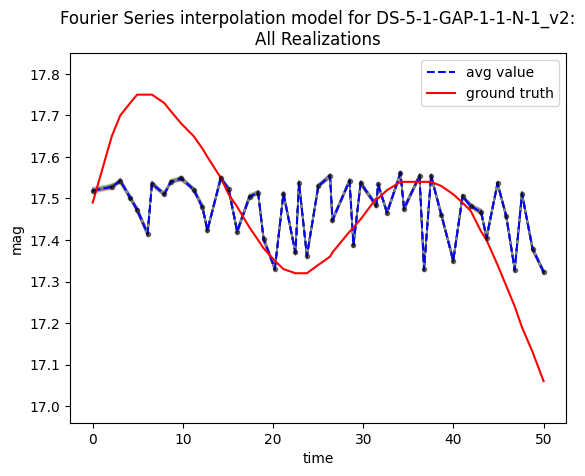

In [973]:
x_train = df_GAP1_N1['time']

fourier_d1 = ModelSet(f'Fourier Series interpolation model for {df_GAP1_N1.name}', x_test, y_test, x_train)

for i in range(100):

    y_train = df_GAP1_N1[i]

    # create ith model
    fit = Fit(model_dict, x = x_train.to_numpy(), y = y_train.to_numpy())

    # train ith model
    fit_result = fit.execute()
    # print(fit_result)

    # generating model predictions
    y_test_pred = fit.model(x = x_test.to_numpy(), **fit_result.params).y
    y_train_pred = fit.model(x = x_train.to_numpy(), **fit_result.params).y

    # storing realization results
    fourier_d1.add_realization(y_test_pred, y_train_pred, y_train)

fourier_d1.plot()

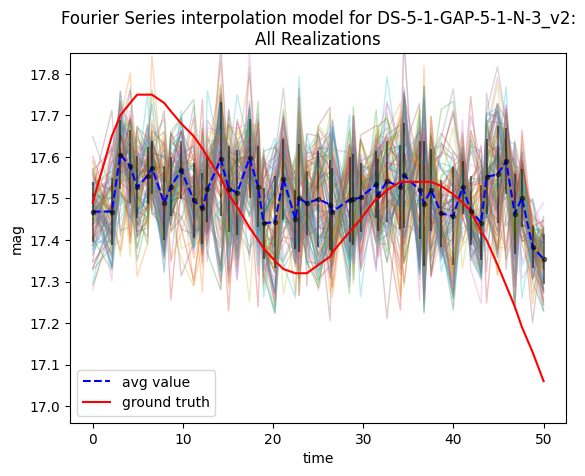

In [974]:
x_train = df_GAP5_N3['time']

fourier_d2 = ModelSet(f'Fourier Series interpolation model for {df_GAP5_N3.name}', x_test, y_test, x_train)

for i in range(100):

    y_train = df_GAP5_N3[i]

    # create ith model
    fit = Fit(model_dict, x = x_train.to_numpy(), y = y_train.to_numpy())

    # train ith model
    fit_result = fit.execute()
    # print(fit_result)

    # generating model predictions
    y_test_pred = fit.model(x = x_test.to_numpy(), **fit_result.params).y
    y_train_pred = fit.model(x = x_train.to_numpy(), **fit_result.params).y

    # storing realization results
    fourier_d2.add_realization(y_test_pred, y_train_pred, y_train)

fourier_d2.plot()

This model's results fell way below expectations, but this could be explained given how the data is notoriously not evenly spaced by nature (it has gaps). Another approach would be to use the FFT signal-resampling methods found on Scipy, but it is currently uncompatible with the `ModelSet` class since it requires an equally spaced interval, which causes dimensionality issues with the evaluation process.

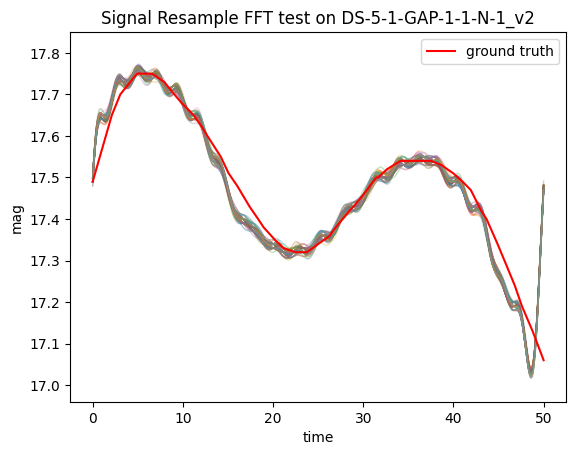

In [975]:
from scipy import signal

x_train = df_GAP1_N1['time']

plt.title(f'Signal Resample FFT test on {df_GAP1_N1.name}')
plt.ylim(y_test.min() - 0.1, y_test.max() + 0.1)

for i in range(100):

    y_train = df_GAP1_N1[i]

    x_train_high_res = np.linspace(x_train.min(), x_train.max(), 1000)
    y_train_pred = signal.resample(y_train, len(x_train_high_res))
    plt.plot(x_train_high_res, y_train_pred, linewidth = 1, alpha = 0.3)

plt.plot(x_test, y_test, 'r', label = 'ground truth')
plt.xlabel('time')
plt.ylabel('mag')
plt.legend(loc="best")
plt.show()

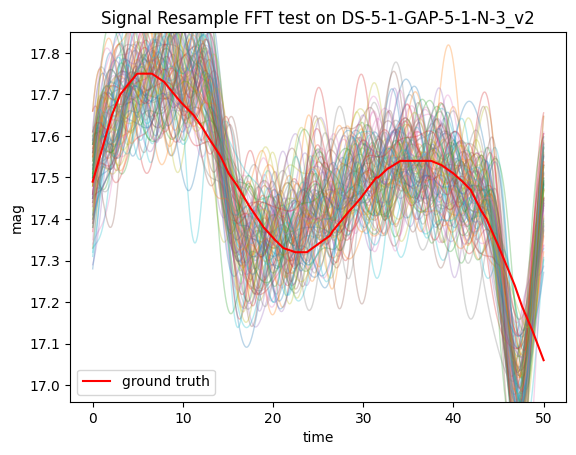

In [976]:
from scipy import signal

x_train = df_GAP5_N3['time']

plt.title(f'Signal Resample FFT test on {df_GAP5_N3.name}')
plt.ylim(y_test.min() - 0.1, y_test.max() + 0.1)

for i in range(100):

    y_train = df_GAP5_N3[i]

    x_train_high_res = np.linspace(x_train.min(), x_train.max(), 1000)
    y_train_pred = signal.resample(y_train, len(x_train_high_res))
    plt.plot(x_train_high_res, y_train_pred, linewidth = 1, alpha = 0.3)

plt.plot(x_test, y_test, 'r', label = 'ground truth')
plt.xlabel('time')
plt.ylabel('mag')
plt.legend(loc="best")
plt.show()

## **Results**

The following tables contain the evaluation metrics for each of the models. In the case of the polynomial interpolation, the degree of the approximating curve was chosen based on the last assignment results (TLDR: the model with the minimum bias value).

In [977]:
models = [linear_d1, polynomial_d1[11], splines_d1, fourier_d1]

data = {
    'Model': ['Linear', 'Polynomial (n = 12)', 'Cubic Splines', 'Fourier'],
    'Training MSE': [m.MSE_train() for m in models],
    'Testing MSE': [m.MSE_test() for m in models],
    'Bias': [m.bias() for m in models],
    'Variance': [m.variance() for m in models],
}

table_d1 = pd.DataFrame(data)

In [978]:
table_d1

,Model,Training MSE,Testing MSE,Bias,Variance
0,Linear,0.014106,0.013891,0.104612,0.001187
1,Polynomial (n = 12),0.000029,0.000020,0.003525,0.003130
2,Cubic Splines,0.000150,0.000169,0.010711,0.002222
3,Fourier,0.022628,0.021947,0.117265,0.002503


In [979]:
models = [linear_d2, polynomial_d2[4], splines_d2, fourier_d2]

data = {
    'Model': ['Linear', 'Polynomial (n = 5)', 'Cubic Splines', 'Fourier'],
    'Training MSE': [m.MSE_train() for m in models],
    'Testing MSE': [m.MSE_test() for m in models],
    'Bias': [m.bias() for m in models],
    'Variance': [m.variance() for m in models],
}

table_d2 = pd.DataFrame(data)

In [980]:
table_d2

,Model,Training MSE,Testing MSE,Bias,Variance
0,Linear,0.020779,0.014379,0.104369,0.021239
1,Polynomial (n = 5),0.005457,0.002235,0.036435,0.040502
2,Cubic Splines,0.005194,0.002208,0.036249,0.043862
3,Fourier,0.025674,0.030006,0.142459,0.092140


## **Conclusions**

Regression models were a great introduction to function approximators, which comprise some of the most powerful tools in modern problem-solving. I mean, basically, everything can be modeled as a function: a system of inputs and outputs. Using such a broad definition of a function allows us to leverage some of the most powerful tools in mathematics. One could say that all modern AI technologies are just function approximators of various degrees of complexity.

## **References**

Burden, R. & Faires, J. (2001). Numerical Analysis, Ninth Edition. Brooks/Cole CENGAGE
Learning. ISBN: 978-0-538-73351-9.

Cuevas, J. (2020). Handouts on Classification Algorithms. DOI:10.13140/RG.2.2.23597.03043/1

Cuevas, J. (2020). Slides of Regression Algorithms: Linear, Polynomial, Splines and Fourier. https://www.researchgate.net/publication/358568302_Slides_of_Regression_Algorithms_Linear_Polynomial_Splines_and_Fourier

Shi, A. & Shi, K. (2020). Polynomial Regression with Scikit learn: What You Should Know. https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2

